In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
classes = {'fumio_kishida':0,'joe_biden':1,'narendra_modi':2, 'scott_morrison':3}

def assign_label(img,class_num):
    return class_num

In [4]:
#Direktori dari masing-masing bagian dataset
train_path="dataset/train"
test_path="dataset/test"
valid_path="dataset/valid"

# Variabel untuk menyimpan value gambar dalam bentuk array untuk dataset training
x_train=[]
# Variabel untuk menyimpan value target dalam bentuk angka untuk dataset training
y_train=[]

# Fungsi untuk menyimpan value kedua variabel di atas sesuai dengan classnya masing-masing
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        label = assign_label(img, classes.get(folder))
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)
        y_train.append(label)

# Variabel untuk menyimpan value gambar dalam bentuk array untuk dataset testing
x_test=[]
# Variabel untuk menyimpan value target dalam bentuk angka untuk dataset testing
y_test=[]

# Fungsi untuk menyimpan value kedua variabel di atas sesuai dengan classnya masing-masing
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        label = assign_label(img, classes.get(folder))
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
        y_test.append(label)

# Variabel untuk menyimpan value gambar dalam bentuk array untuk dataset validasi
x_val=[]
# Variabel untuk menyimpan value target dalam bentuk angka untuk dataset validasi
y_val=[]

# Fungsi untuk menyimpan value kedua variabel di atas sesuai dengan classnya masing-masing
for folder in os.listdir(valid_path):
    sub_path=valid_path+"/"+folder
    for img in os.listdir(sub_path):
        label = assign_label(img, classes.get(folder))
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)
        y_val.append(label)

In [5]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_y=np.array(y_train)
test_y=np.array(y_test)
val_y=np.array(y_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [5]:
class_names = ["Fumio Kishida", "Joe Biden", "Narendra Modi", "Scott Morrison"]
class_names[val_y[0]]

'Fumio Kishida'

In [29]:
from tensorflow import keras
import tensorflow as tf

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[224, 224, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])
model.layers

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 300)               45158700  
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 4)                 404       
                                                                 
Total params: 45189204 (172.38 MB)
Trainable params: 45189204 (172.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [10]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adadelta",
              metrics=["accuracy"])

In [36]:
history = model.fit(train_x, train_y, epochs=30,
                    validation_data=(val_x, val_y))

Epoch 1/30
60/60 [==============================] - 43s 680ms/step - loss: 1.2826 - accuracy: 0.4016 - val_loss: 1.1960 - val_accuracy: 0.4708
Epoch 2/30
60/60 [==============================] - 39s 650ms/step - loss: 1.1370 - accuracy: 0.4938 - val_loss: 1.1282 - val_accuracy: 0.4792
Epoch 3/30
60/60 [==============================] - 39s 649ms/step - loss: 1.0890 - accuracy: 0.5370 - val_loss: 1.2043 - val_accuracy: 0.4333
Epoch 4/30
60/60 [==============================] - 39s 650ms/step - loss: 1.0546 - accuracy: 0.5615 - val_loss: 1.0614 - val_accuracy: 0.5250
Epoch 5/30
60/60 [==============================] - 39s 648ms/step - loss: 1.0140 - accuracy: 0.5922 - val_loss: 1.0564 - val_accuracy: 0.5417
Epoch 6/30
60/60 [==============================] - 39s 650ms/step - loss: 0.9727 - accuracy: 0.6130 - val_loss: 1.0708 - val_accuracy: 0.5125
Epoch 7/30
60/60 [==============================] - 39s 649ms/step - loss: 0.9488 - accuracy: 0.6276 - val_loss: 1.0717 - val_accuracy: 0.5208

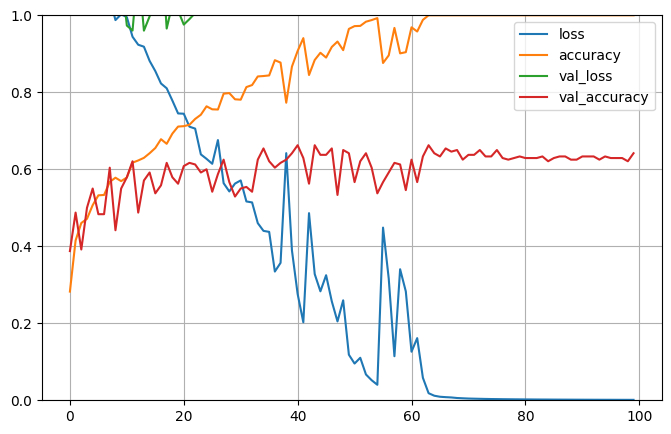

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [121]:
model.evaluate(test_x, test_y)

8/8 [==============================] - 0s 27ms/step - loss: 1.4549 - accuracy: 0.4708


[1.4549440145492554, 0.47083333134651184]

In [140]:
y_probs = model.predict(test_x)
y_preds = y_probs.argmax(axis = 1)




8/8 [==============================] - 1s 62ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 3, 3, 3, 3, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 3, 3, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 3,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 3, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 3, 3, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 2, 3, 2, 3, 3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 2, 2, 2, 2, 1, 1],
      dtype=int64)

In [123]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [6]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

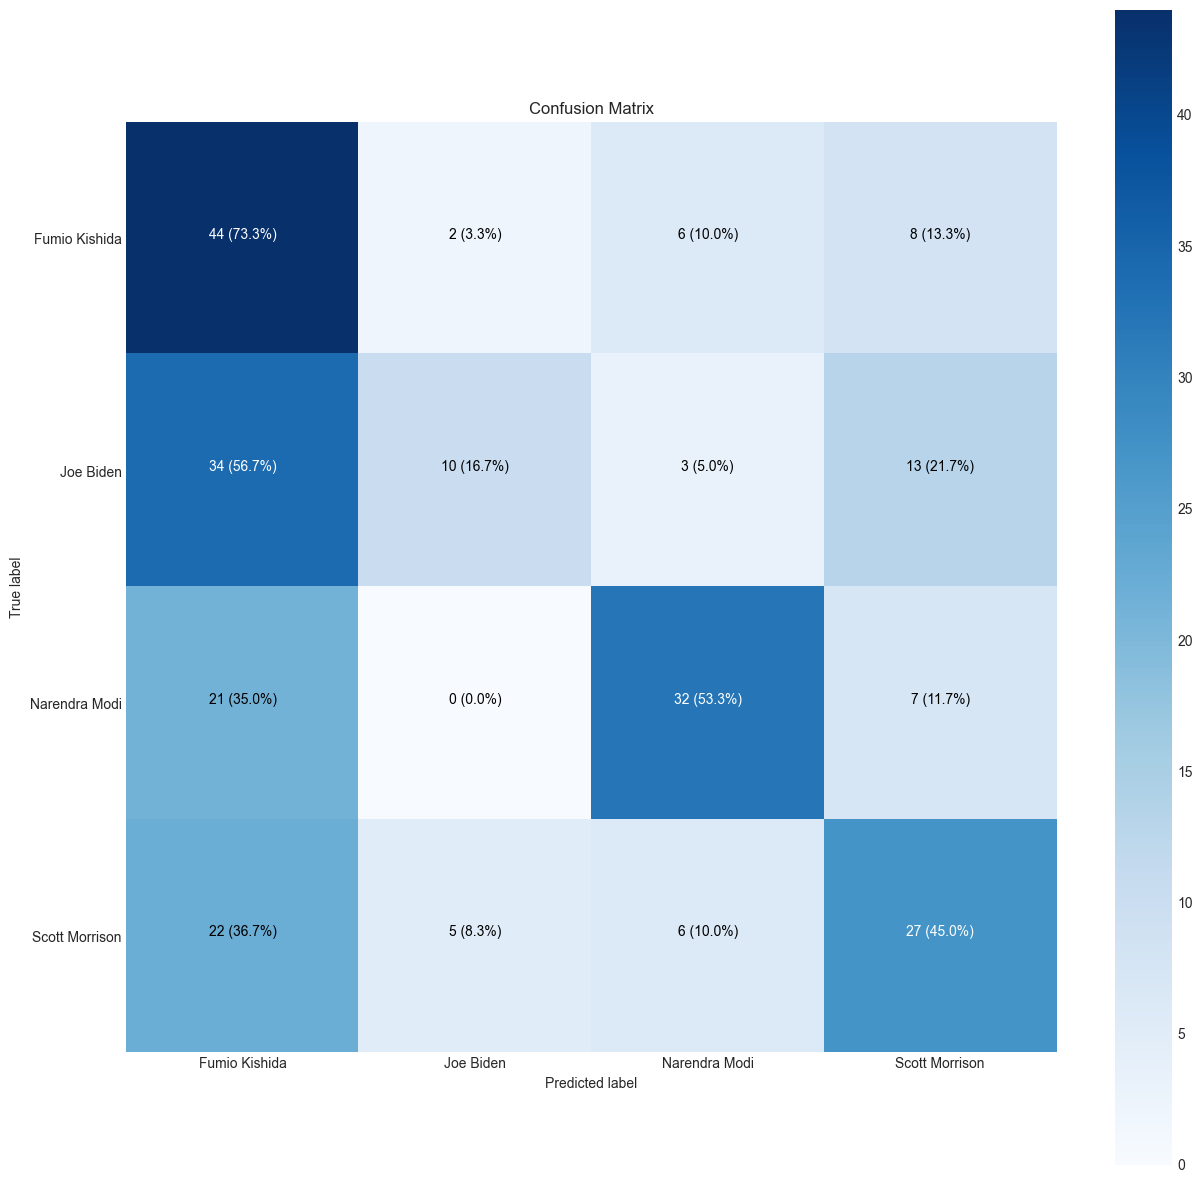

In [124]:
plt.style.use('seaborn-v0_8-dark')
make_confusion_matrix(y_true=test_y, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_preds, target_names=class_names))

                precision    recall  f1-score   support

 Fumio Kishida       0.36      0.73      0.49        60
     Joe Biden       0.59      0.17      0.26        60
 Narendra Modi       0.68      0.53      0.60        60
Scott Morrison       0.49      0.45      0.47        60

      accuracy                           0.47       240
     macro avg       0.53      0.47      0.45       240
  weighted avg       0.53      0.47      0.45       240

